# Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. 

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

## 1. Load the `sat_scores.csv` dataset and describe it

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

In [3]:
from pprint import pprint

f = open('/Users/gemmaboyle/Desktop/GA-DSI/resource_datasets/resource-datasets/admissions/sat_scores.csv')
csv_reader = csv.reader(f)
lines = []
for line in csv_reader:
    lines.append(line)

group1 = []
group2 = []
group3 = []
group4 = []

for i in range(1,53):
    group1.append(lines[i][0])
    group2.append(lines[i][1])
    group3.append(lines[i][2])
    group4.append(lines[i][3])

header1 = lines[0][0]
header2 = lines[0][1]
header3 = lines[0][2]
header4 = lines[0][3]
   
group2 = [int(x) for x in group2]
group3 = [int(x) for x in group3]
group4 = [int(x) for x in group4]

data = {}
data[header1] = group1
data[header2] = group2
data[header3] = group3
data[header4] = group4

pprint(data)


{'Math': [510,
          513,
          515,
          505,
          516,
          499,
          499,
          506,
          500,
          501,
          499,
          510,
          499,
          489,
          501,
          488,
          474,
          526,
          499,
          527,
          499,
          515,
          510,
          517,
          525,
          515,
          542,
          439,
          539,
          512,
          542,
          553,
          542,
          589,
          550,
          545,
          572,
          589,
          580,
          554,
          568,
          561,
          577,
          562,
          596,
          550,
          570,
          603,
          582,
          599,
          551,
          514],
 'Rate': [82,
          81,
          79,
          77,
          72,
          71,
          71,
          69,
          69,
          68,
          67,
          65,
          65,
          63,
          60,
         

### 1.2 Make a pandas DataFrame object 

In [4]:
df2 = pd.DataFrame(data)
df2.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     int64 
 2   Verbal  52 non-null     int64 
 3   Math    52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [6]:
sats_scores = '/Users/gemmaboyle/Desktop/GA-DSI/resource_datasets/resource-datasets/admissions/sat_scores.csv'
df = pd.read_csv(sats_scores)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     int64 
 2   Verbal  52 non-null     int64 
 3   Math    52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### Answer
There is no difference between the d-types of the dataframe made from the dictionary and that made from directly importing the CSV file through pandas, that is, state is an object but the numerical data variables (Rate, Verbal and Math) are integers. 

### 1.3 What does our data describe?

In [8]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


### Answer
The data shows the  verbal test scores and math test scores for the SAT exams according to state as well as the rate of pupils taking exams within the state. 

In [9]:
df.shape

(52, 4)

In [10]:
df.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [11]:
df.nunique()

State     52
Rate      36
Verbal    39
Math      38
dtype: int64

In [12]:
df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


## 2. Create a "data dictionary" based on the data

### Answer

#### State
Description: The US state in which the schools within the data are situated.
Type: Categorical 
No. of unique data points: 52

#### Rate
Description: The rate of pupils taking the SAT's exam within the state. 
Type: numerical, discrete (treated as a continuous variable for this analysis)
Range: 4 to 82

#### Verbal
Description: The verbal SAT test score as an integer.
Type: numerical, discrete (treated as a continuous variable for this analysis) 
Range: 482 to 593

#### Math
Description: The mathematics SAT test score as an integer. 
Type: numerical, discrete (treated as a continuous variable for this analysis) 
Range: 439 to 603

## 3. Plot the data 

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`


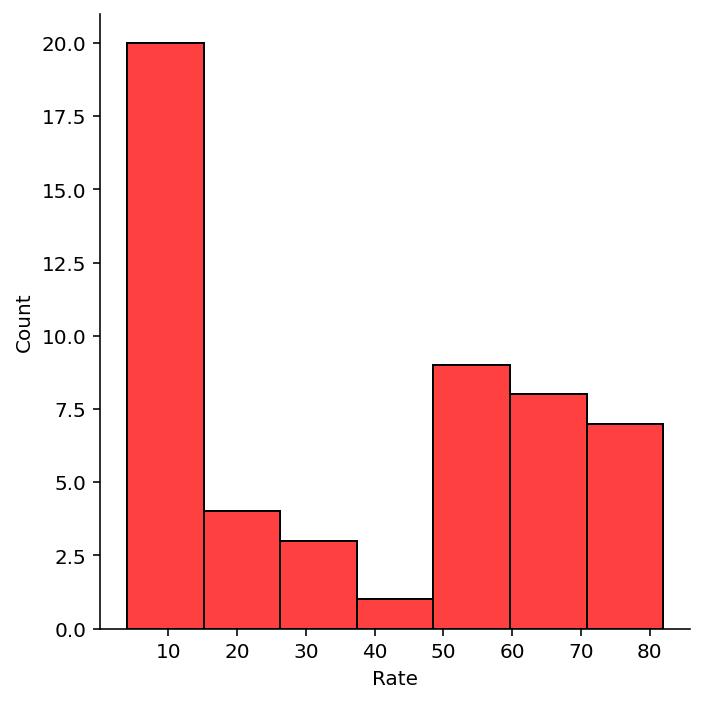

In [13]:
# I used displot as distplot is being discontinued and it's looks nicer

sns.displot(df.Rate, bins=7, kde=False, color='red');

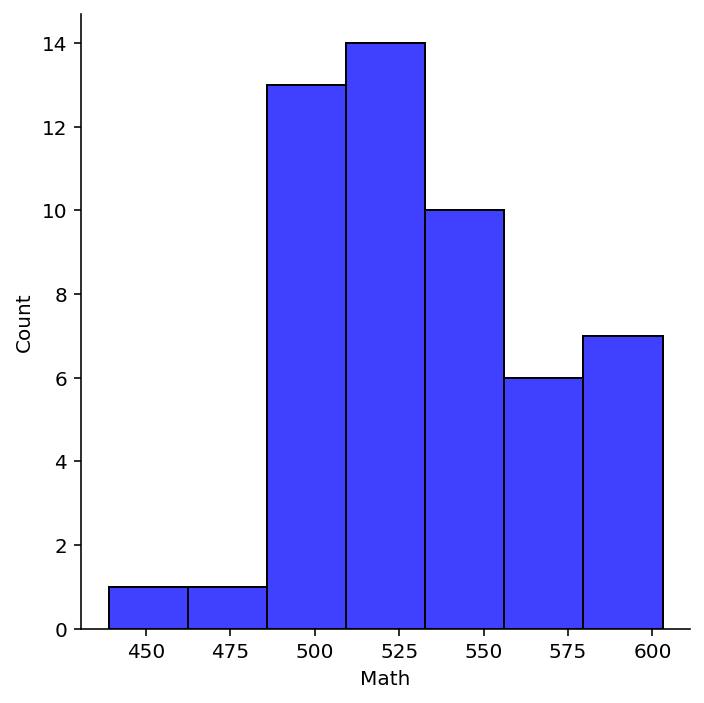

In [14]:
sns.displot(df.Math, bins=7, kde=False, color='blue');

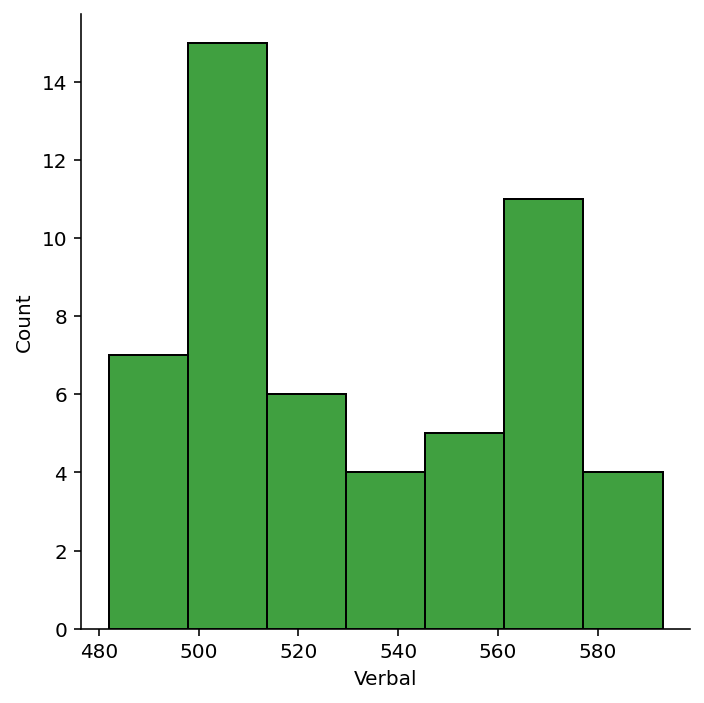

In [15]:
sns.displot(df.Verbal, bins=7, kde=False, color='green');

### 3.2 Show the joint distributions for each of `Rate`, `Math`, and `Verbal`

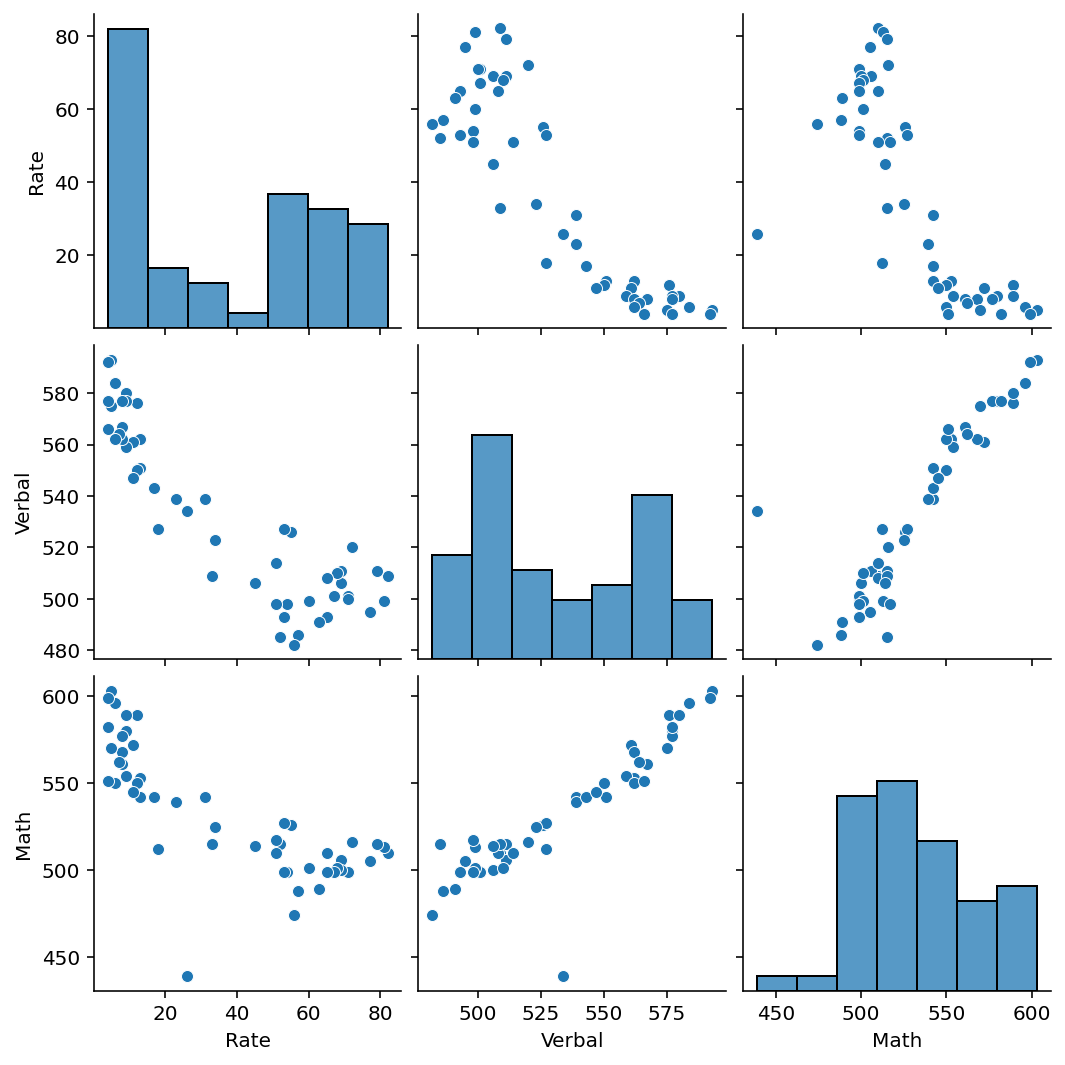

In [17]:
sns.pairplot(df);

### Interpretation of pairplot:
There is positive correlation between Math test scores and Verbal test score. Larger Math test scores coincide with larger Verbal test scores. 

There is negative correlation between Rate and Math test scores. Larger rates coincide wtih lower Math test scores.

There is a negative correlation betweeen Rate and Verbal test scores. Larger rates coincide with lower Verbal test scores. 

## 4. Plot the data 

### 4.1 Plot a stacked histogram with `Verbal` and `Math` 

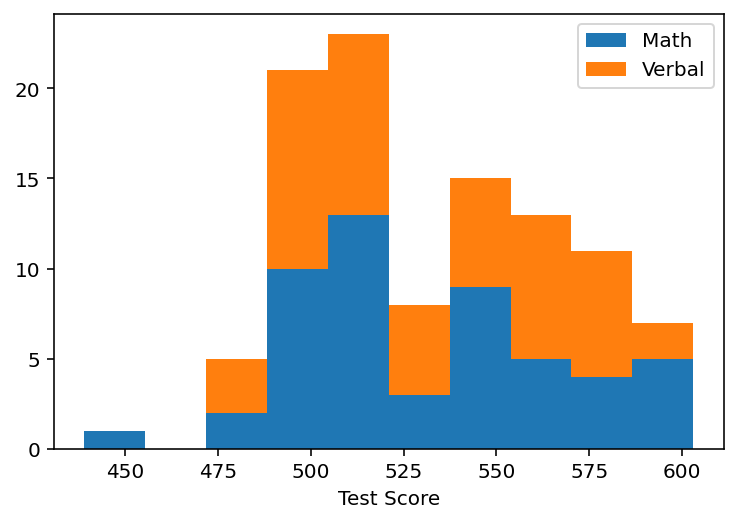

In [18]:
import matplotlib.pyplot as plt

math_verbal = df[['Math','Verbal']]
plt.hist(math_verbal, stacked = True);
plt.legend(('Math','Verbal'))
plt.xlabel('Test Score')
plt.show()

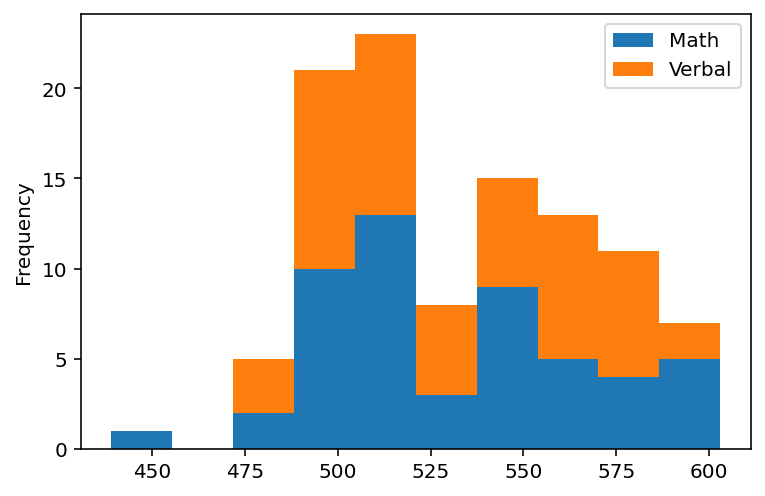

In [19]:
math_verbal.plot(kind='hist', stacked=True);

### 4.2 Plot `Verbal` and `Math` on the same chart 

A single scatterplot compares bivariate data, that is two variables. If we wanted more than 2 variables compared we could certainly use a pair plot, however these are more difficult to read and require further interpretation. We could use a stacked histogram but these can also become cumbersome for several sets of data. With a boxplot (particularly normalised plots) you can compare different data sets quickly and get a lot of information in an asthetically pleasing way without further interpretation, such as outliers and the skew of the interquartile range, something which is more difficult on a histogram. 

Verbal and Math can go on the same boxplot as they have a similar scale (e.g lower limits are upper limits are 482 and 439, upper limits are 593 and 603 respectively) so can be compared directly. Rate however has lower and upper limits of 4 and 82 respectively. If rate is plotted on the same axis as the test score variables, it will be 'squished' to the left of the graph (when stacked horizontally), hence this would not be appropriate. 

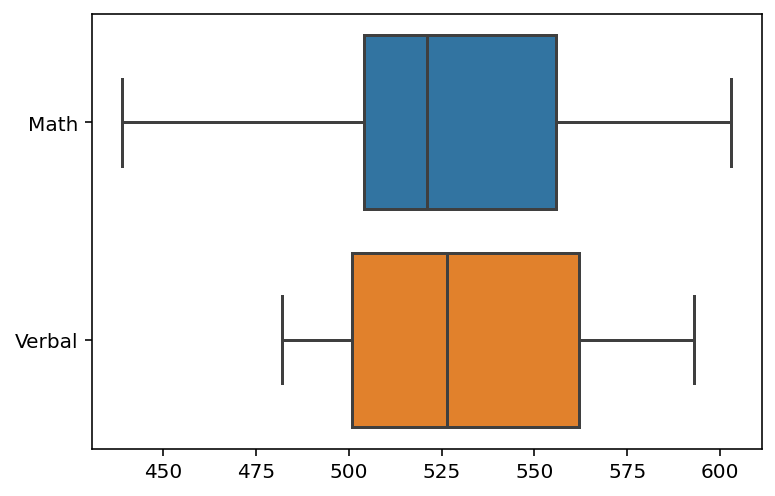

In [20]:
sns.boxplot(data = math_verbal, orient = 'h');

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same chart

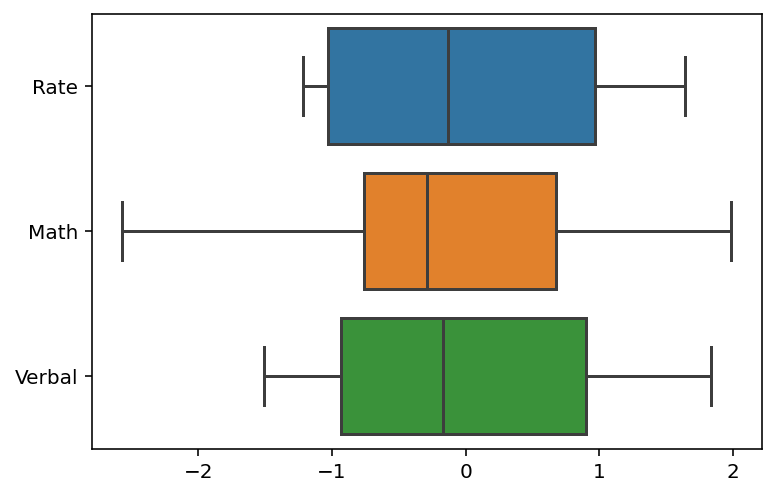

In [21]:
continuous_variables = ['Rate','Math','Verbal']

def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

df_stand = var_standardized(df[continuous_variables])

sns.boxplot(data = df_stand, orient = 'h');

## 5. Create and examine subsets of the data
### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?

In [22]:
df.Verbal.mean()

532.0192307692307

In [23]:
mean_df = df[df['Verbal'] > df.Verbal.mean()].State
mean_df.shape

(24,)

### Answer

There are 24 states that have a verbal score greater than the mean, of a possible 52. This means there are some particuarly high scores on the upper end of the verbal range, meaning the data is positively skewed and the mean is being 'pulled up' by these values. This feature can also be read from the box-plot, shown by the larger distance between Q2 and Q3 than Q1 and Q2. Given that there are 24 values above the mean and 28 values below, which is close to an even split, the positive skew is not particuarly pronounced. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [24]:
df.Verbal.median()

526.5

In [25]:
median_df = df[df['Verbal'] > df.Verbal.median()].State
median_df.shape

(26,)

### Note

The method below uses lists, as this was my initial reaction. Further down the page there is a better explanation using the concat method.

In [26]:
mean_list = []
for i in mean_df:
    mean_list.append(i)

print(mean_list)

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [27]:
median_list = []
for i in median_df:
    median_list.append(i)
    
print(median_list)

['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [28]:
for i in mean_list:
    if i in median_list:
        median_list.remove(i)
        
difference = median_list
difference


['WA', 'WV']

### Note

This method did work but I felt like a concat / merge might be more appropriate, hence there is a second method below 


In [29]:
med_for_merge = median_df.sort_values().reset_index()
mean_for_merge = mean_df.sort_values().reset_index()
pd.concat([med_for_merge, mean_for_merge], axis=1)

,index,State,index,State
0,39,AL,39.0,AL
1,45,AR,45.0,AR
2,26,CO,26.0,CO
3,47,IA,47.0,IA
4,30,ID,30.0,ID
5,33,IL,33.0,IL
6,38,KS,38.0,KS
7,34,KY,34.0,KY
8,43,LA,43.0,LA
9,36,MI,36.0,MI


This also shows that the the schools above the median are the same as the schools above the mean, barring WV (West Virginia) and WA (Washington) which are above the median but below the mean (The same outcome as the list method shown above). 

There will always be equal numbers of data points above and below the median, this being how the median is constructed 

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

In [30]:
df['Difference'] = df['Verbal'] - df['Math']
df.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [31]:
df_difference = df.sort_values('Difference', ascending = False).reset_index()
high_verbal_low_math = df_difference.head(10)
high_verbal_low_math.head(3)

,index,State,Rate,Verbal,Math,Difference
0,27,OH,26,534,439,95
1,50,MS,4,566,551,15
2,29,WV,18,527,512,15


In [32]:
df_difference = df.sort_values('Difference',ascending = True).reset_index()
high_math_low_verbal = df_difference.head(10)
high_math_low_verbal.head(3) 

,index,State,Rate,Verbal,Math,Difference
0,21,HI,52,485,515,-30
1,23,CA,51,498,517,-19
2,1,NJ,81,499,513,-14


## 6. Examine summary statistics

### 6.1 Create the correlation matrix of your variables

What does the correlation matrix tell you?


In [33]:
df[continuous_variables].corr()

,Rate,Math,Verbal
Rate,1.000000,-0.773746,-0.886432
Math,-0.773746,1.000000,0.899871
Verbal,-0.886432,0.899871,1.000000


### Answer

Rate and Math have a negative linear correlation: As maths test scores increase, the rate decreases. 

Rate and Verbal have a strong negative linear correlation: As verbal test scores increase, the rate decreases. 

Math score and Verbal score have a strong positive linear correlation: As math test scores increase verbal test scores also increase. 

All of these results are consistent with the interpretation of the pair plots earlier in the notebook. 


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [34]:
df.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


### Answer

Count: A count of the number of data points in each series.

Mean: The value of each amount if the total for each variable was spread evenly amoung all data points. 

min / max: The largest and smallest data points in each variable cateory. 

std: The standard deviation, a measure of how close on average data points lie to the mean

25%: Q1, also known as the lower quarilte, 25% of the data lies below this value, with 75% above. 

50%: Q2, also known as the median, 50% of the data lies below this value and 50% above

75%: Q3, also known as the upper quartile, 75% of the data lie below this value with 25% above.. 


### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [35]:
df[continuous_variables].cov()

,Rate,Math,Verbal
Rate,745.387632,-760.803922,-804.355958
Math,-760.803922,1297.078431,1077.147059
Verbal,-804.355958,1077.147059,1104.646682


### Answer

The covariance matrix also gives an indication of the direction of correlation between variables, for example the negative in Rate against Verbal tells us there is a negative linear correlation between the variables. However, the strength of this linear correlation is difficult to read from the given values as they have not been standardised according to the standard deviations of the variables and so are not currently comparable. 

The correlations can be found from the covariance by dividing the values by the product of the standard deviations of the variables (e.g, the correlation between Rate and Verbal can be found by dividing -804.3... by the standard deviation of the Rate data set and the standard deviation of the Verbal set). For the covariance between the same variable we divide the covariance by the standard deviation of the variable squared, that is by the variance, which will always give a value of 1. A variable is always pefectly positively correlated with itself as all points will lie exactly along a straight line. 

The correlation matrix is preferred as the standardisation of the numbers mean that the type of correlation, as well as the strength, can be directly interpreted with +1 meaning perfect positive correlation and -1 meaning perfect negative correlation. 

## 7. Performing EDA on "drug use by age" data.

### 7.1 Load the drug use by age data 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [36]:
drugs = pd.read_csv('/Users/gemmaboyle/Desktop/GA-DSI/resource_datasets/resource-datasets/drug_use_by_age/drug-use-by-age.csv')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [37]:
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [38]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [39]:
drugs.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [40]:
drugs.shape

(17, 28)

In [41]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [42]:
# Clean the dashes and turn them into nan 

drugs = drugs.applymap(lambda x: np.nan if x=='-' else x )

In [43]:
# Once we get the objects sorted out then get rid of first two columns (age and n) 
# so we can do statistical analysis, turn each variable into a float object to eliminate
# any object types and lastly drop the null values for further analysis. 

numerical_drugs = drugs.iloc[:,2:]
numerical_drugs = numerical_drugs.astype(float)
numerical_drugs = numerical_drugs.dropna()
numerical_drugs

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
3,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,1.1,57.5,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,0.7,88.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,0.6,50.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0


In [44]:
numerical_drugs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 3 to 15
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alcohol-use              13 non-null     float64
 1   alcohol-frequency        13 non-null     float64
 2   marijuana-use            13 non-null     float64
 3   marijuana-frequency      13 non-null     float64
 4   cocaine-use              13 non-null     float64
 5   cocaine-frequency        13 non-null     float64
 6   crack-use                13 non-null     float64
 7   crack-frequency          13 non-null     float64
 8   heroin-use               13 non-null     float64
 9   heroin-frequency         13 non-null     float64
 10  hallucinogen-use         13 non-null     float64
 11  hallucinogen-frequency   13 non-null     float64
 12  inhalant-use             13 non-null     float64
 13  inhalant-frequency       13 non-null     float64
 14  pain-releiver-use        13 

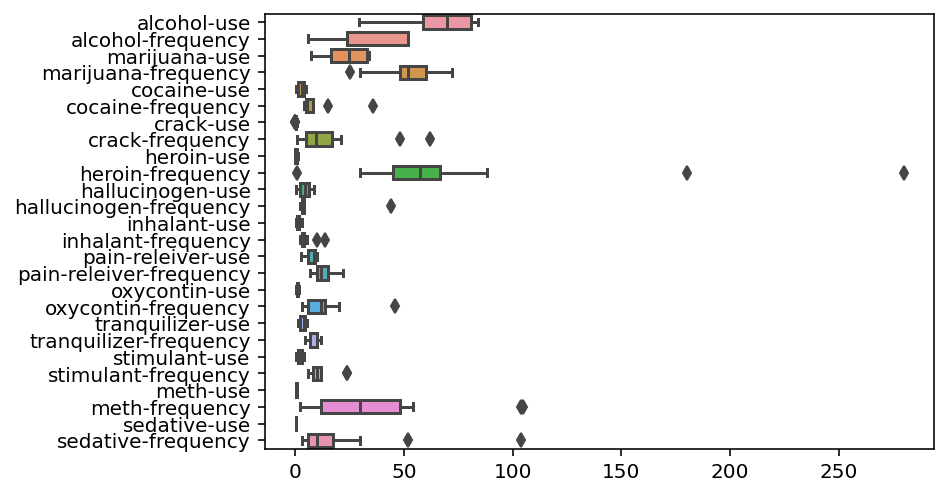

In [45]:
sns.boxplot(data = numerical_drugs, orient = 'h');

In [46]:
# This is a pairplot for all variables (mostly for fun). It actually takes a long time to 
# run and display and is not particuarly useful until you click into it. 

sns.pairplot(numerical_drugs);


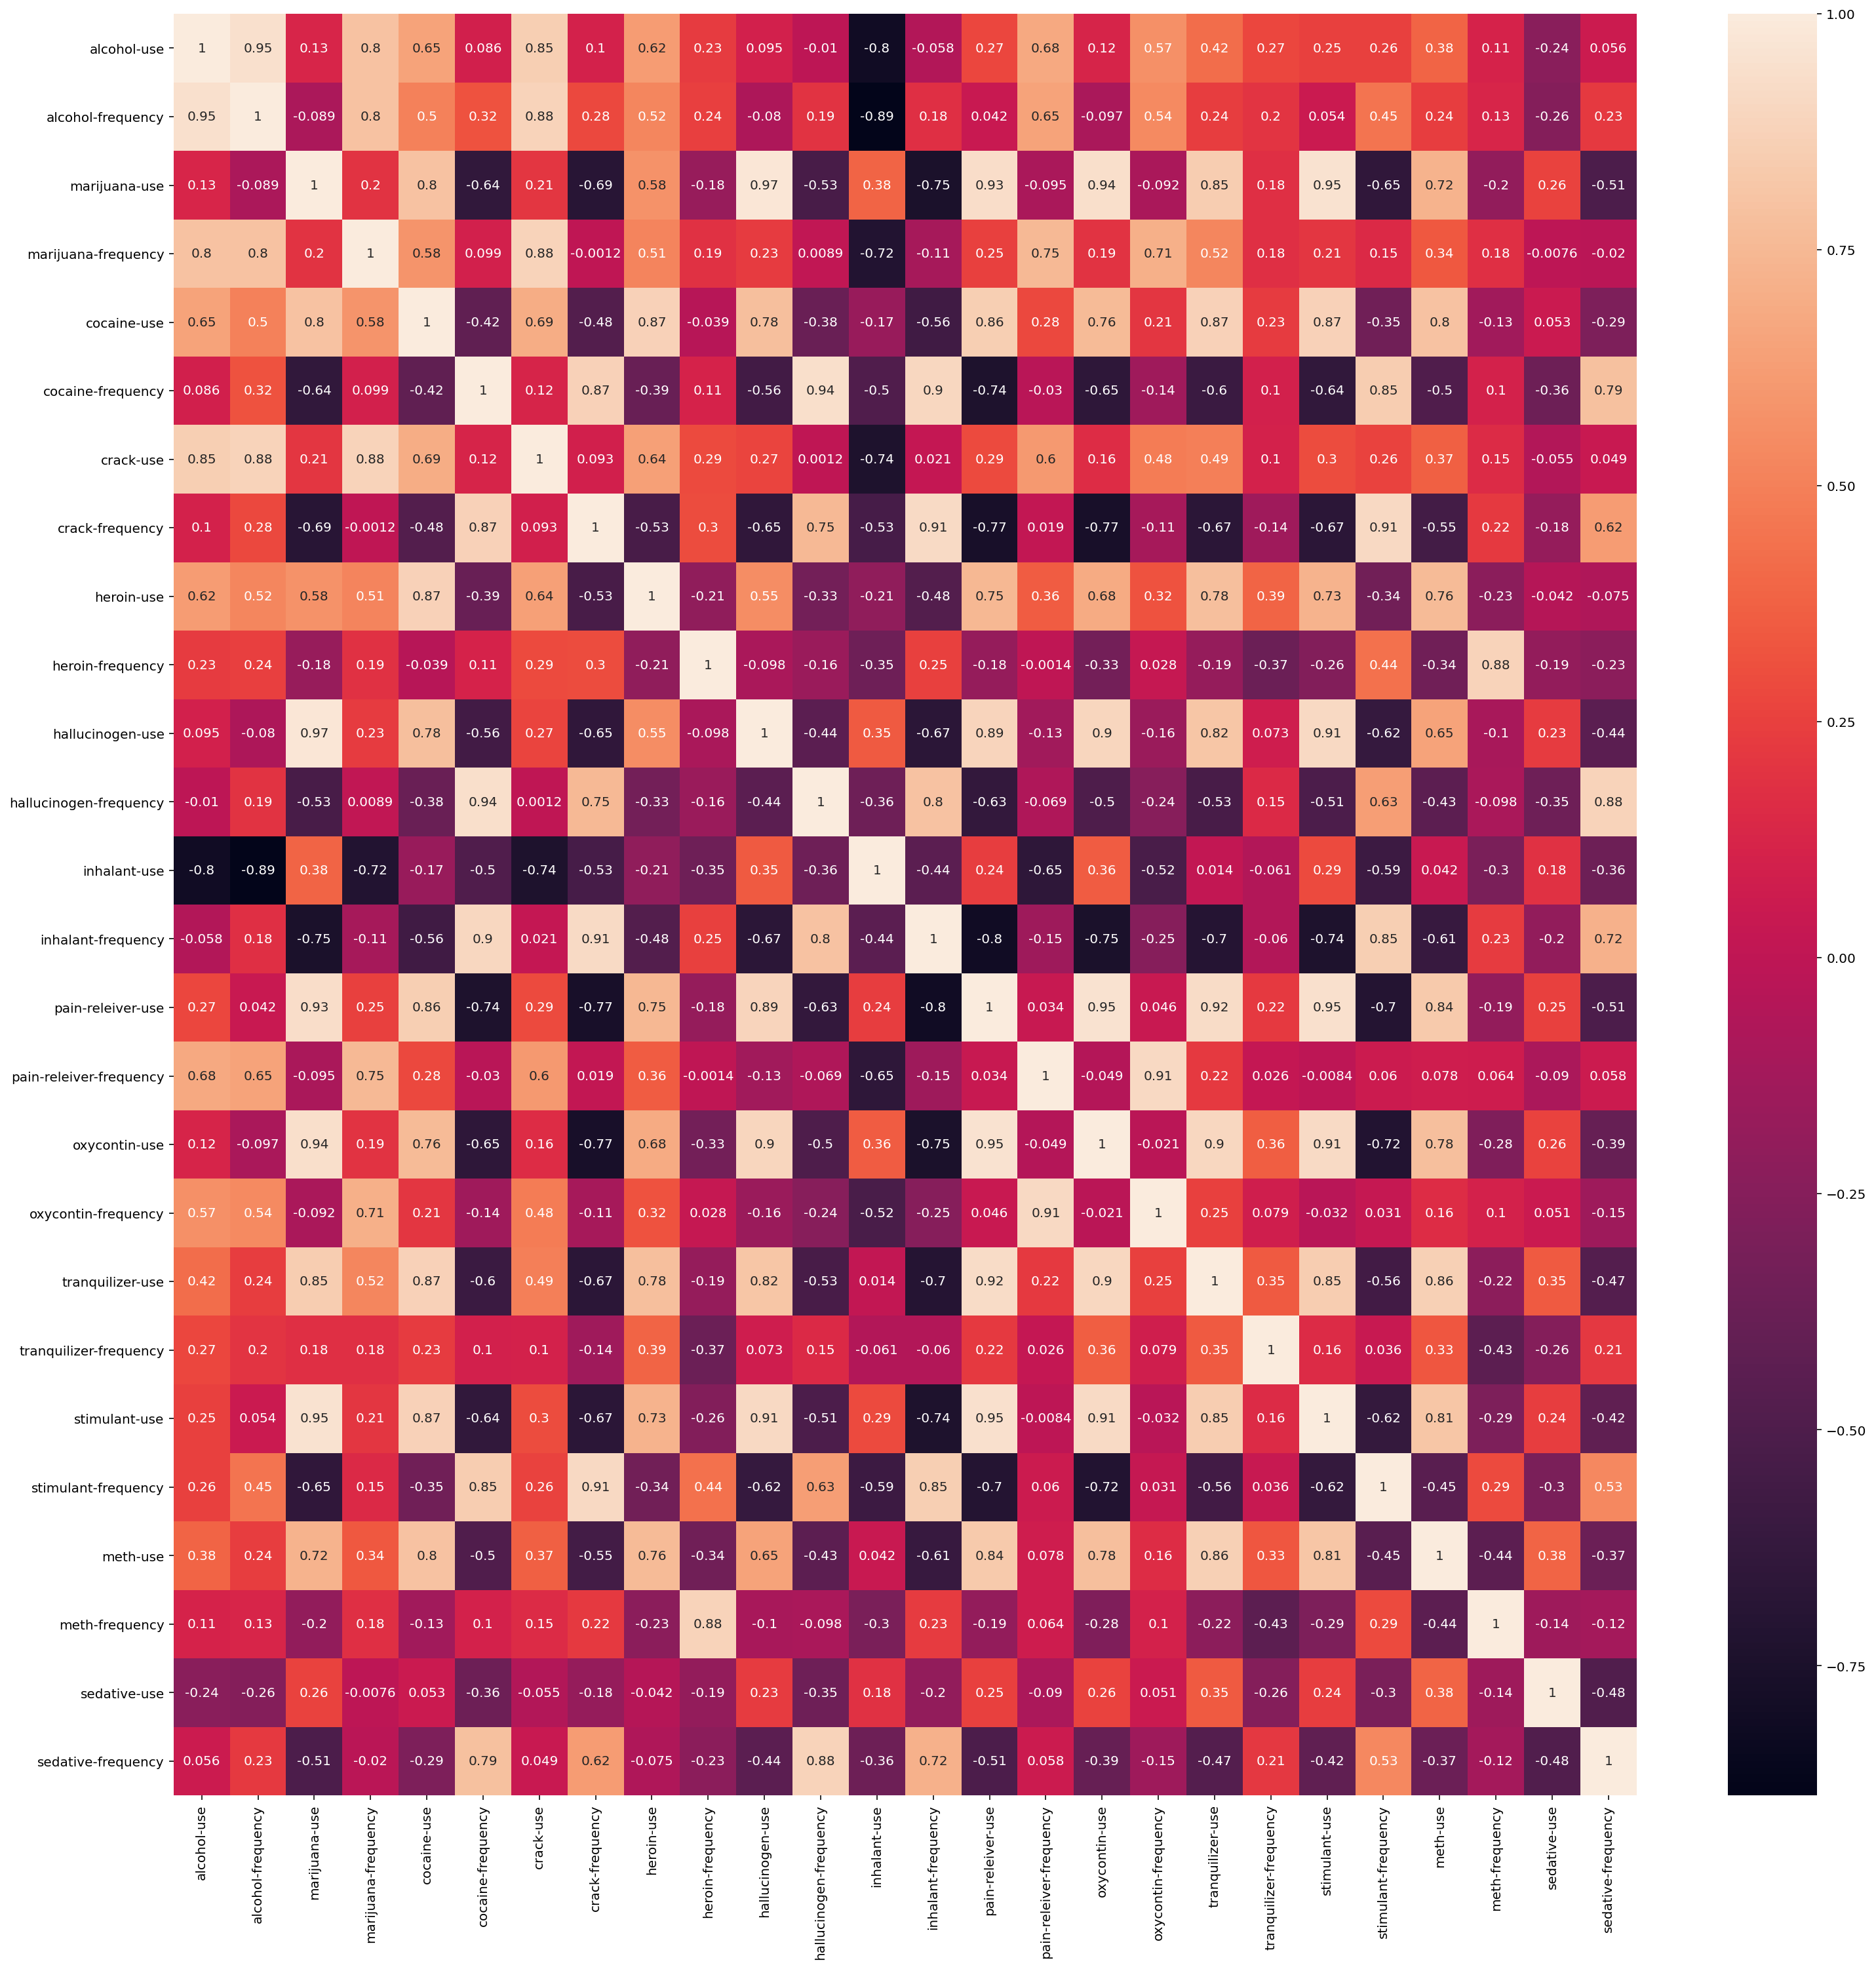

In [47]:
# This heatmap describes all variables, as a way to pick out larger values of correlation

plt.figure(figsize=(25, 25))
sns.heatmap(numerical_drugs.corr(), annot=True)
plt.show()

### Answer


### 7.3 Create a testable hypothesis about this data

### Hypothesis 
There is a correlation between cocaine-use / frequency and alcohol-use / frequency. 

Deliverables: Visual and numerical representation of the correlation between alcohol-use / cocaine-use and alcohol-frequency / cocaine-frequency along with an interpretation of the outcome. 

In [48]:
cocaine_and_alcohol = numerical_drugs[['cocaine-use','alcohol-use',
                                       'cocaine-frequency','alcohol-frequency']]

cocaine_and_alcohol

,cocaine-use,alcohol-use,cocaine-frequency,alcohol-frequency
3,0.5,29.2,4.0,6.0
4,1.0,40.1,7.0,10.0
5,2.0,49.3,5.0,13.0
6,3.2,58.7,5.0,24.0
7,4.1,64.6,5.5,36.0
8,4.9,69.7,8.0,48.0
9,4.8,83.2,5.0,52.0
10,4.5,84.2,5.0,52.0
11,4.0,83.1,6.0,52.0
12,3.2,80.7,5.0,52.0


In [49]:
subset_stand = var_standardized(cocaine_and_alcohol)

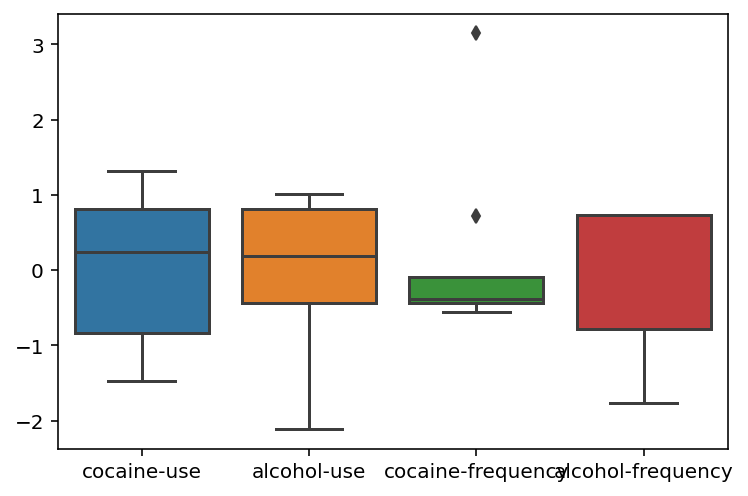

In [50]:
sns.boxplot(data = subset_stand);

### Interpretation
There are outliers in the cocaine-frequency data set that may decrease the correlation coefficient between this variable and the others. I intend to remove outliers which are more than 1.5 standard deviations above the mean. I have not considered the lower bound of the outliers due to the shape of the boxplots above. 

In [51]:
# Calculate outlier upper bound

mean = cocaine_and_alcohol['cocaine-frequency'].mean()
sd = cocaine_and_alcohol['cocaine-frequency'].std()

upper_bound = mean + 1.5*sd
upper_bound

21.774736333576957

In [52]:
# Remove the row with the cocaine-frequency outlier of 36 

cocaine_and_alcohol_clean = cocaine_and_alcohol.drop([15])
cocaine_and_alcohol_clean.shape


(12, 4)

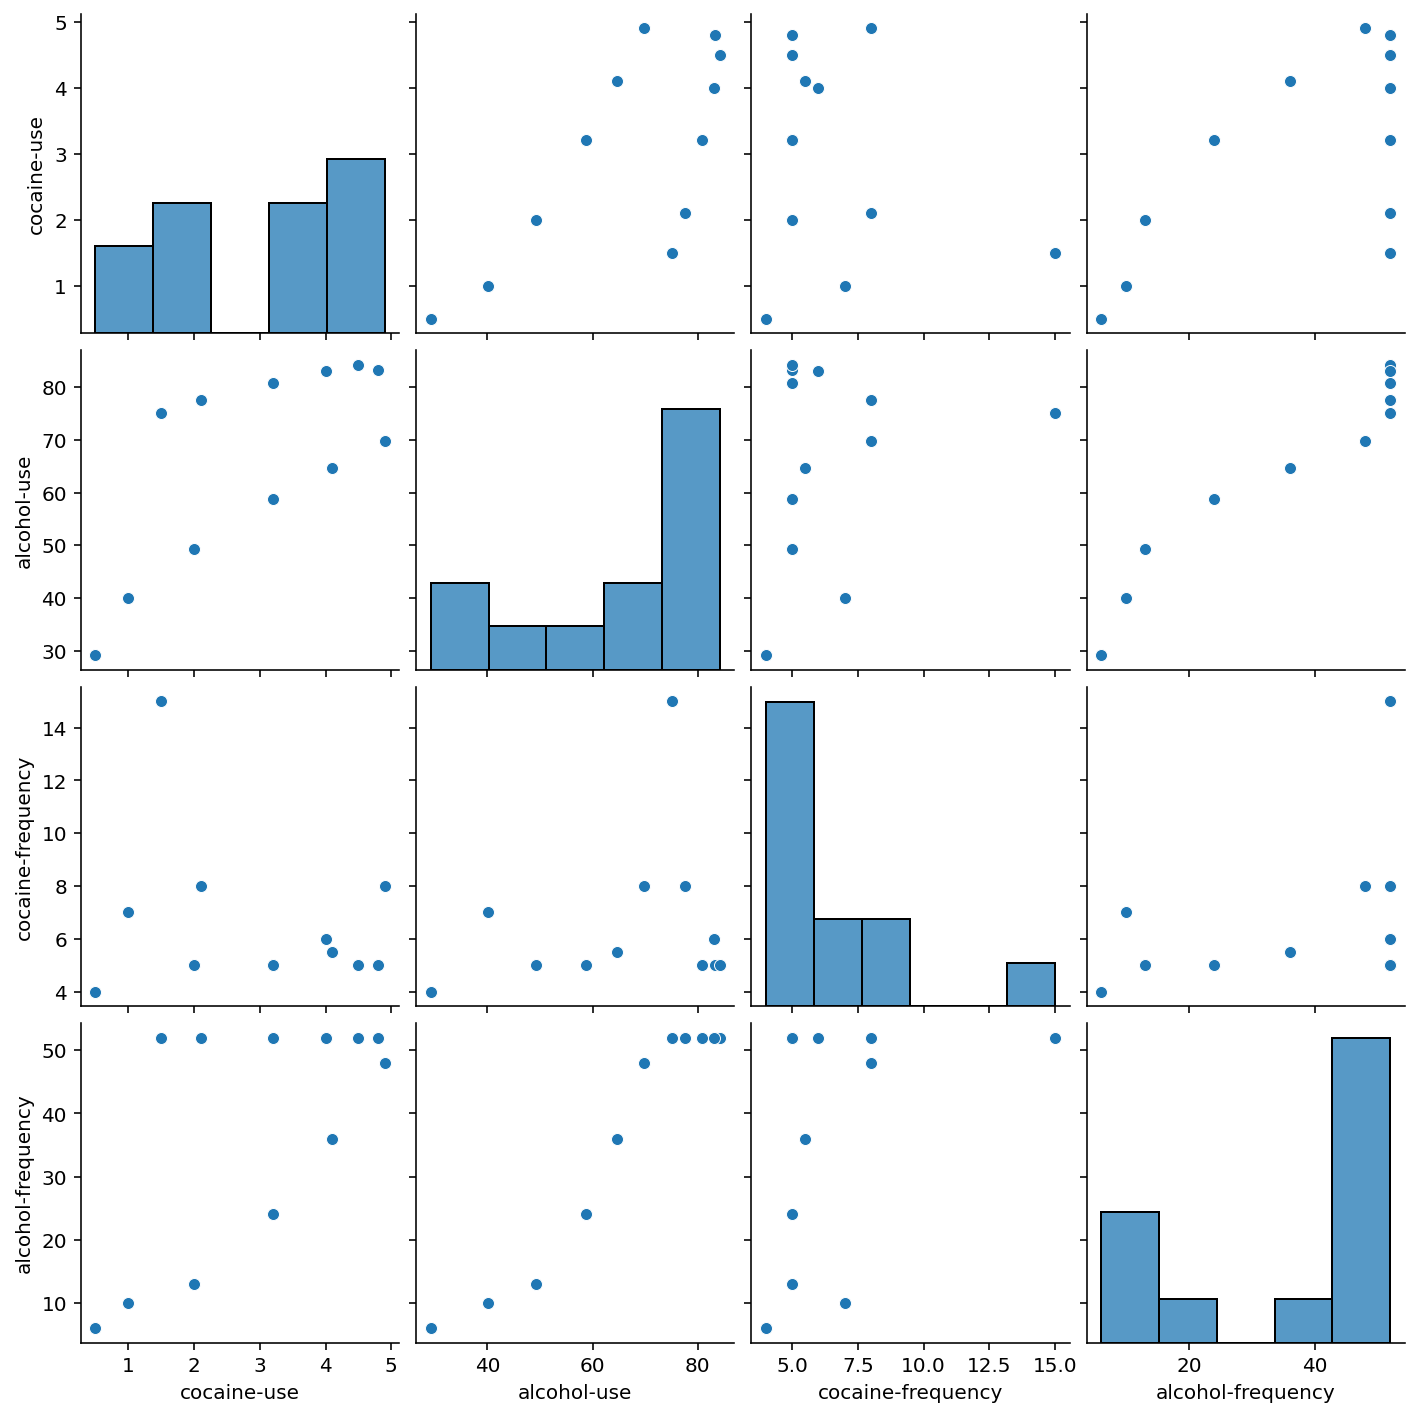

In [53]:
sns.pairplot(cocaine_and_alcohol_clean);

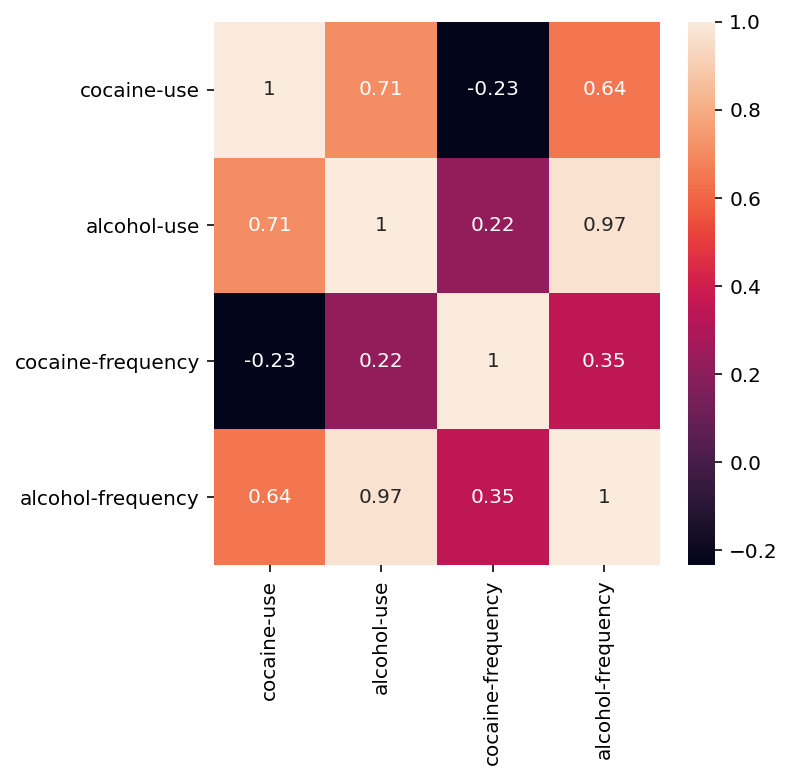

In [54]:
# Pearson correlation coefficient heatmap

plt.figure(figsize=(5, 5))
sns.heatmap(cocaine_and_alcohol_clean.corr(), annot=True)
plt.show()

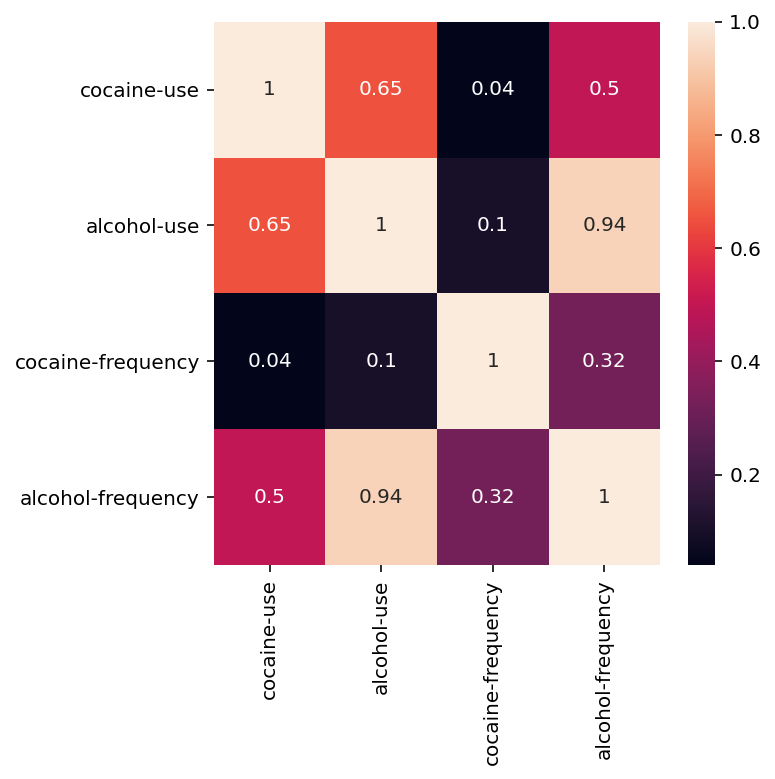

In [55]:
# Spearmans rank correlation heatmap

plt.figure(figsize=(5, 5))
sns.heatmap(cocaine_and_alcohol_clean.corr(method = 'spearman'), annot=True)
plt.show()

### Perform a spearmans rank correlation hypothesis test 

5% significance

Ho: rho = 0

H1: rho > 0

n = 12

rs = 0.65

critical value = 0.503

The test is signficant, therefore there is evidence of a positive association between alcohol-use and cocaine-use. 


### Report 

The pair plots and Pearson heatmap show a strong positive linear correlation between alcohol use and alcohol frequency, suggesting those who drink alcohol do so often. Given the social use of alcohol, as well as it's legality, this is not suprising. This relationship does not hold for cocaine frequency and cocaine use, where the correlation is close to 0. 

A more interesting possible correlation is that between alcohol-use and cocaine-use, the value of 0.71 may show a positive linear correlation between the varibles. However, none of the variables are normally distributed, as shown by the pair plot, hence a correlation hypothesis test based on a Pearsons coefficient would not be appropriate. 

Since Spearmans coefficient is non-parametric and therefore does not rely on an underlying bivariate normal distribution, an hypothesis test with the Spearmans coefficient shows a significant positive assocation between alcohol-use and cocaine use at the 5% level, suggesting a predictive model could be built here. 

## 8. Dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. 

In [56]:
rate = df[['Rate']]
rate.describe()

,Rate
count,52.000000
mean,37.153846
std,27.301788
min,4.000000
25%,9.000000
50%,33.500000
75%,63.500000
max,82.000000


In [57]:
# An outlier is defined as being more than 1.5 standard deviations above the mean or
# 1.5 standard deviations below the mean. The upper and lower bound are calculated below. 

mean = rate.mean()
sd = rate.std()

upper_bound = mean + 1.5*sd
lower_bound = mean - 1.5*sd

print(upper_bound)
print(lower_bound)

Rate    78.106528
dtype: float64
Rate   -3.798836
dtype: float64


In [58]:
# Remove outliers from the data (there are only outliers on the upper end)

rate_clean = rate[rate['Rate'] < 78.1]
rate_clean.describe()

,Rate
count,49.000000
mean,34.489796
std,25.812725
min,4.000000
25%,9.000000
50%,31.000000
75%,57.000000
max,77.000000


### Comparison
Mean in rate ~37, mean in cleaned rate ~34, decrease as this is not being skewed in the positive direction by the larger outliers on the upper end of the data. 

Median in rate ~33.5, median in cleaned rate ~31, decrease as removing the largest points of the data set decreases the size of the data set which will 'move' the median down the set. 

Standard deviation in rate ~27, standard deviation in cleaned rate ~25, the decrease is due to the remove of the data points which are the farthest from the mean, making the average distance from the mean smaller. 

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

In [59]:
verbal_and_math = df[['Verbal','Math']]
verbal_and_math.corr(method="spearman")

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


### Answer
The rank correlation is close to 1, this means that high ranking states in scores of math tests tend to coincide with high ranking states in scores of verbal tests. Given that the spearmans rank correlation coefficient is higher than the pearsons product moment correlation coefficient we might conclude that there is a high level of positive association between the variables and that a non-linear model for the data may be better than a linear one (given that 

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [ ]:
df['rate_percentile'] = df.Rate.rank(pct = True)
df.head()

As percentiles are also ranked data they can be used to calcualte the spearmans rank coefficient, using either of these will give the same values for the spearmans rank value. 

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

As percentiles are ranked, each value is taken equally and therefore calculations can be performed on the data without removing outliers from the data set giving useable output that isn't skewed by outliers in the set. 

In [ ]:
drugs['marijuana-frequency'].hist();

In [ ]:
marijuana_rank = drugs['marijuana-frequency'].rank(pct = True).reset_index()

In [ ]:
marijuana_rank['marijuana-frequency'].hist();